In [28]:
import pandas as pd
import Data_Manager as dm
from datetime import datetime as dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
rows = dm.read_spiele('bundesliga') # bundesliga, liga3, liga2, quote
bl = pd.DataFrame(rows, columns = ['spiel_id','team1','tore_heim','tore_aus','team2','day'])

bl['datetime'] = [dt.strptime(element, '%Y-%m-%d') for element in bl['day']]
bl.drop('day', axis=1, inplace=True)
bl['tor_diff'] = bl['tore_heim'] - bl['tore_aus']
bl['win'] = bl['tor_diff']/abs(bl['tor_diff'])
bl.set_index('spiel_id', inplace = True)
bl.fillna(0, inplace = True)

In [88]:
bl.head()

,team1,tore_heim,tore_aus,team2,datetime,tor_diff,win
spiel_id,,,,,,,
1,12,1,1,14,1963-08-24,0,0.0
2,2,3,2,3,1963-08-24,1,1.0
3,9,1,1,11,1963-08-24,0,0.0
4,19,1,4,16,1963-08-24,-3,-1.0
5,21,1,1,20,1963-08-24,0,0.0


In [100]:
X = bl.drop(['tore_heim','tore_aus','tor_diff', 'datetime', 'win'], axis = 1)
y = bl['win']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [148]:
dtree = DecisionTreeClassifier(max_leaf_nodes=20,
)

In [149]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
predictions = dtree.predict(X_test)

In [151]:
#mean =  (predictions - y_test)/2
#mean.value_counts()

 0.0    2690
 0.5    1150
 1.0    1014
-1.0     137
-0.5     133
Name: win, dtype: int64

In [152]:
print(classification_report(y_test,predictions))
#print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.42      0.16      0.24      1213
         0.0       0.00      0.00      0.00      1283
         1.0       0.54      0.95      0.68      2628

   micro avg       0.52      0.52      0.52      5124
   macro avg       0.32      0.37      0.31      5124
weighted avg       0.37      0.52      0.41      5124



C:\Users\rob90\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [161]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
rfc_pred = rfc.predict(X_test)

In [163]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        -1.0       0.35      0.20      0.25      1213
         0.0       0.30      0.16      0.21      1283
         1.0       0.55      0.79      0.65      2628

   micro avg       0.49      0.49      0.49      5124
   macro avg       0.40      0.38      0.37      5124
weighted avg       0.44      0.49      0.45      5124



In [153]:
### Visualisierung ###
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns)
features

['team1', 'team2']

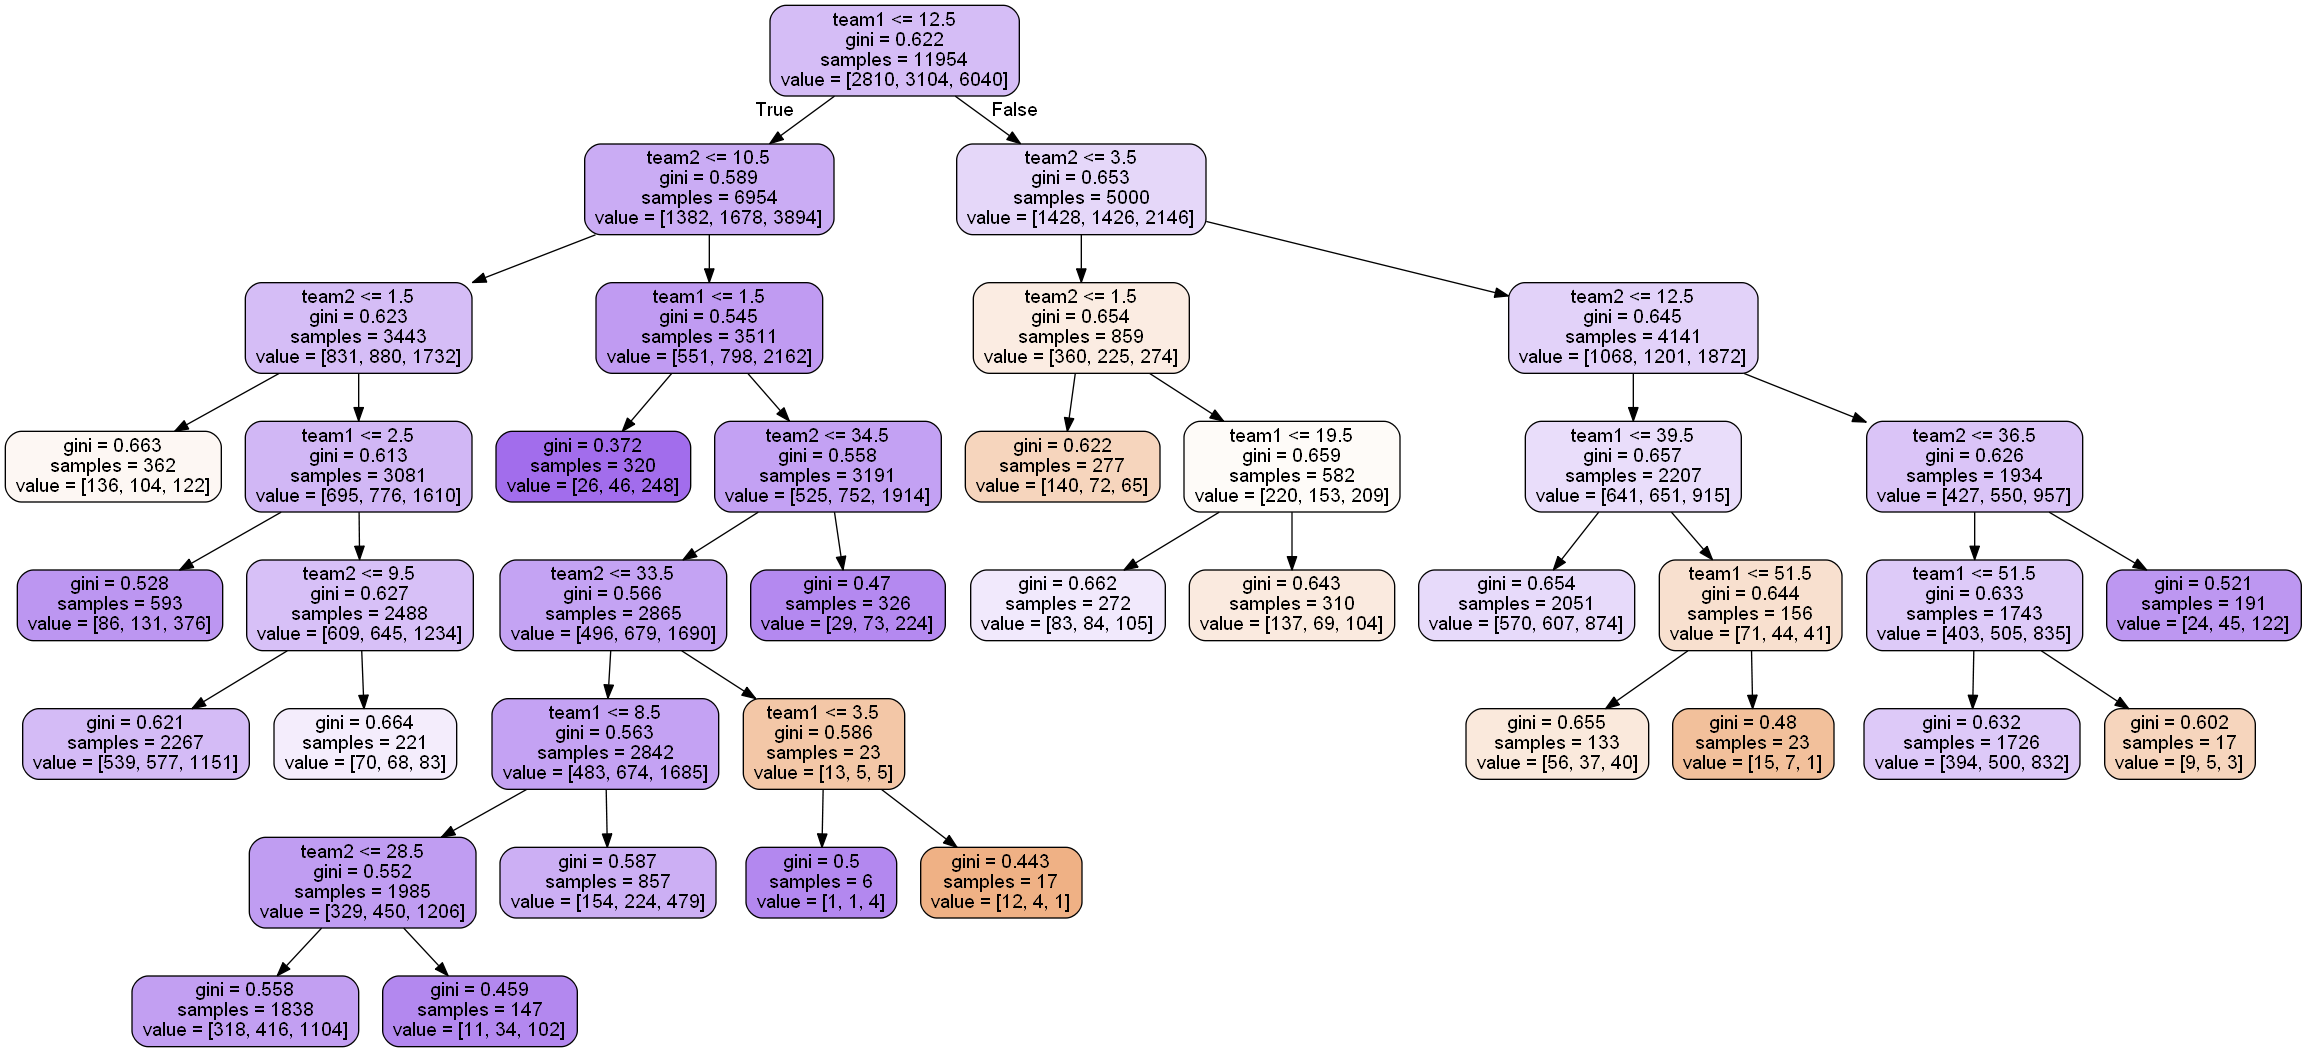

In [154]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  